In [1]:
# EXAMINE NOTE CHOICE IN PHRASE
# EXAMINE PITCH CLASS CHOICE IN PHRASE
# EXAMINE DURATION CHOICE IN PHRASE
# EXAMINE UP AND DOWN MOVEMENT IN PHRASE
# EXAMINE STEP AND LEAP MOVEMENT IN PHRASE

In [2]:
import pandas as pd
from textwrap import wrap
#import seaborn
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
from IPython.core.display import Image 
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.mpl_style', 'default')
pd.set_option('display.notebook_repr_html', True)
import data_methods
import warnings
warnings.filterwarnings("ignore")
def _repr_latex_(self):
    return self.to_latex()
pd.DataFrame._repr_latex_ = _repr_latex_  

from music21 import *

%matplotlib inline
%pylab inline
plt.style.use('ggplot')


plt.rcParams["font.family"] = "arial"

/Users/jamiegabriel/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Populating the interactive namespace from numpy and matplotlib


In [3]:
#UTILITY TO MANAGE LABEL WRAPPING
labels=["Number of phrases starting at this measure location",
        "Number of phrases ending at this measure location",
        'Number of phrases'
       ]
labels = [ '\n'.join(wrap(l, 20)) for l in labels ]

In [4]:
def create_set_of_pitches_within_octave(data_row):
    ret_arr = []
    
    for i in range(0, len(data_row["Different pitches used in phrase"])):
        ret_arr.append(data_row["Different pitches used in phrase"][i] % 12)
    return len(list(set(ret_arr)))

In [5]:
all_melodies = pd.read_pickle('./data_frames/all_melodies_frame')

In [47]:
all_melodies.columns

Index(['Phrase midi numbers', 'Title', 'Phrase durations', 'Performer name',
       'Number of notes in phrase', 'Measure in which phrase begins',
       'Measure in which phrase ends',
       'Measure location in which phrase begins',
       'Measure location in which phrase ends', 'Range of phrase in semitones',
       'Number of pitches used in phrase', 'Highest pitch used in phrase',
       'Lowest pitch used in phrase', 'Different pitches used in phrase',
       'Different durations used in phrase', 'Longest duration used in phrase',
       'Shortest duration used in phrase',
       'Number of different durations used in phrase',
       'Phrase midi numbers transposed to start on middle C',
       'Distances between subsequent phrase notes',
       'Number of positive steps or leaps in phrase',
       'Number of negative steps or leaps in phrase',
       'Number of step movements (by tones or semitones) in phrase',
       'Number of leap movements (by minor thirds or above) in phr

In [48]:

all_melodies["Percentage of unique pitches used in phrase"] = all_melodies["Number of pitches used in phrase"] / all_melodies['Number of notes in phrase'] * 100
all_melodies["Percentage of unique pitches used in phrase"] = all_melodies["Percentage of unique pitches used in phrase"].astype(int)
all_melodies["Percentage of unique durations used in phrase"] = all_melodies["Number of different durations used in phrase"] / all_melodies['Number of notes in phrase'] * 100
all_melodies["Percentage of unique durations used in phrase"] = all_melodies["Percentage of unique durations used in phrase"].astype(int)
all_melodies["Number of different pitch classes used in phrase minimized to one octave"] = all_melodies.apply(create_set_of_pitches_within_octave, axis=1)

kj_solos = all_melodies[all_melodies["Performer name"] == 'Keith Jarrett']
ref_solos = all_melodies[all_melodies["Performer name"] != 'Keith Jarrett']
attya = kj_solos[kj_solos["Title"] == "All The Things You Are"]
sbs = kj_solos[kj_solos["Title"] == "Stella By Starlight"]
sdmpwc = kj_solos[kj_solos["Title"] == "Someday My Prince Will Come"]
gh = kj_solos[kj_solos["Title"] == "Groovin High"]
dowar = kj_solos[kj_solos["Title"] == "Days Of Wine And Roses"]
al = kj_solos[kj_solos["Title"] == "Autumn Leaves"]
iiwab = kj_solos[kj_solos["Title"] == "If I Were A Bell"]


attya_r = ref_solos[ref_solos["Title"] == "All The Things You Are"]
sbs_r = ref_solos[ref_solos["Title"] == "Stella By Starlight"]
al_r = ref_solos[ref_solos["Title"] == "Autumn Leaves"]

In [49]:
# Average and median amount of uniqueness found in all phrases
print(kj_solos["Percentage of unique pitches used in phrase"].mean())
print(kj_solos["Percentage of unique pitches used in phrase"].median())
print(ref_solos["Percentage of unique pitches used in phrase"].mean())
print(ref_solos["Percentage of unique pitches used in phrase"].median())

64.92181818181818
62.0
71.27329192546584
66.0


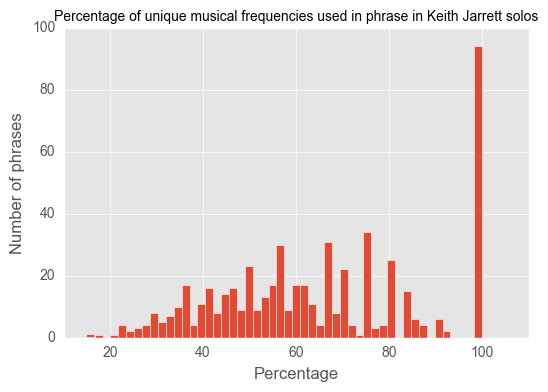

In [50]:
# Histogram of all uniqueness
fig = kj_solos["Percentage of unique pitches used in phrase"].hist(bins=50)
fig.set_title('Percentage of unique musical frequencies used in phrase in Keith Jarrett solos', fontsize=10)
fig.set_xlabel('Percentage')
fig.set_ylabel('Number of phrases')


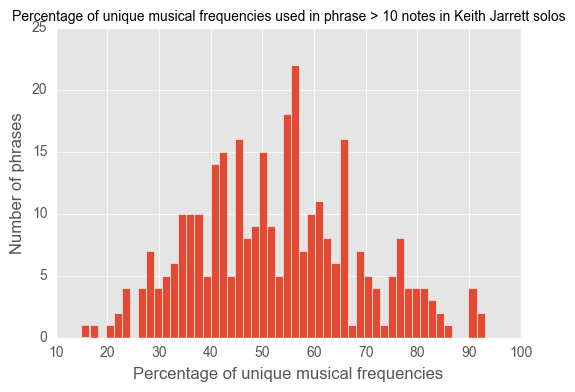

In [51]:
# Above over 90 musical phrases have 100% uniques
# This may be because this is picking up very small phrases so small phrases will now be excluded
x = kj_solos[kj_solos['Number of notes in phrase'] > 10]
fig = x["Percentage of unique pitches used in phrase"].hist(bins=50)
fig.set_title('Percentage of unique musical frequencies used in phrase > 10 notes in Keith Jarrett solos', fontsize=10)
fig.set_xlabel('Percentage of unique musical frequencies')
fig.set_ylabel('Number of phrases')

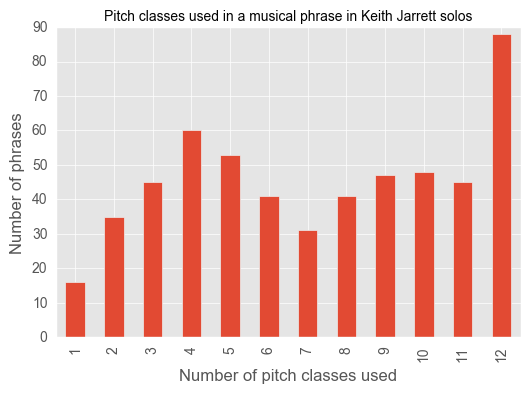

In [52]:
# Examine the number pitch classes that are used
fig = kj_solos.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar")
fig.set_title('Pitch classes used in a musical phrase in Keith Jarrett solos', fontsize=10)
fig.set_xlabel('Number of pitch classes used')
fig.set_ylabel(labels[2])

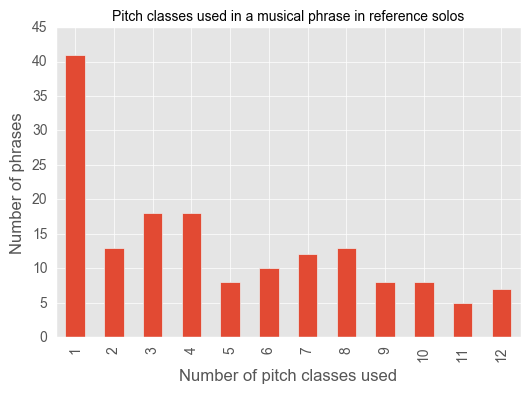

In [53]:
#NOT ENOUGH SAMPLE TO LOOK AT THESE
fig = ref_solos.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar")
fig.set_title('Pitch classes used in a musical phrase in reference solos', fontsize=10)
fig.set_xlabel('Number of pitch classes used')
fig.set_ylabel(labels[2])

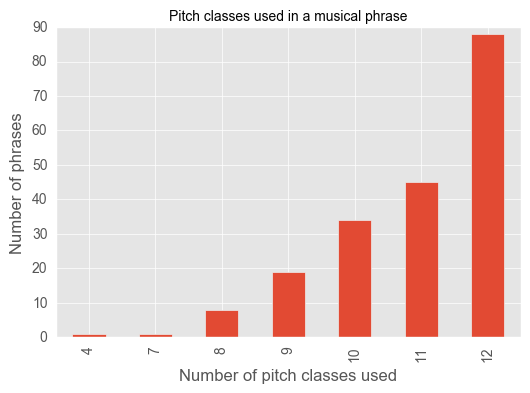

In [54]:
#Assume that the higher number of notes in the melody, the more notes will be used. 
# OVer 20 note melodies use beyond standard scale
x = kj_solos[kj_solos['Number of notes in phrase'] > 20]
fig = x.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar")
fig.set_title('Pitch classes used in a musical phrase', fontsize=10)
fig.set_xlabel('Number of pitch classes used')
fig.set_ylabel(labels[2])

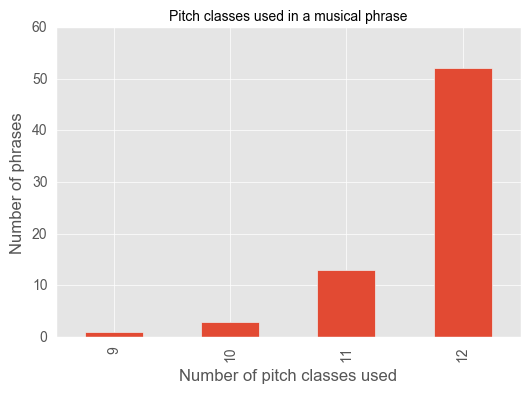

In [55]:
#more pronounced over 40
x = kj_solos[kj_solos['Number of notes in phrase'] > 40]
fig = x.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar")
fig.set_title('Pitch classes used in a musical phrase', fontsize=10)
fig.set_xlabel('Number of pitch classes used')
fig.set_ylabel(labels[2])

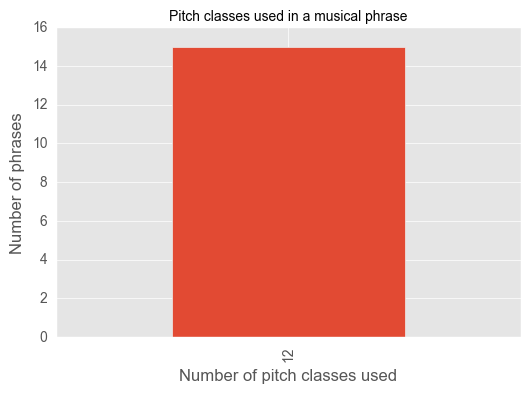

In [56]:
#Suggeststthat jazz melodies use, only 15 of these, but all use all notes of the octave, challenge to notion of 
x = kj_solos[kj_solos['Number of notes in phrase'] > 64]
fig = x.groupby("Number of different pitch classes used in phrase minimized to one octave").count()["Phrase midi numbers"].plot(kind="bar")
fig.set_title('Pitch classes used in a musical phrase', fontsize=10)
fig.set_xlabel('Number of pitch classes used')
fig.set_ylabel(labels[2])

In [57]:

print(kj_solos["Percentage of unique durations used in phrase"].mean())
print(kj_solos["Percentage of unique durations used in phrase"].median())

25.381818181818183
16.0


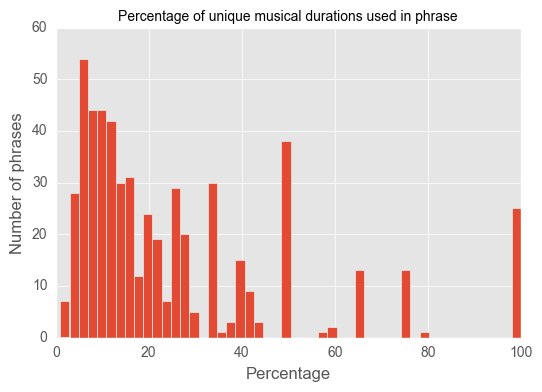

In [58]:
fig = kj_solos["Percentage of unique durations used in phrase"].hist(bins=50)
fig.set_title('Percentage of unique musical durations used in phrase', fontsize=10)
fig.set_xlabel('Percentage')
fig.set_ylabel('Number of phrases')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

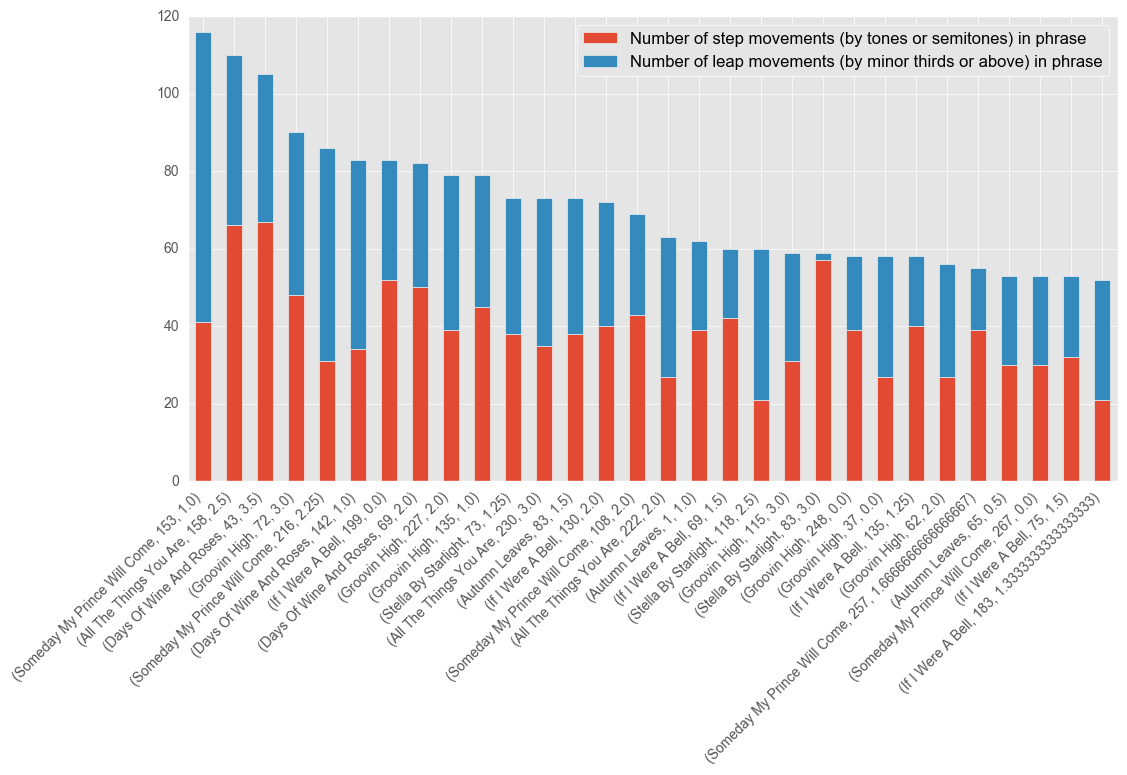

In [59]:
#STEPS VS LEAPS - KJ
x = kj_solos[kj_solos['Number of notes in phrase'] > 40]
x = x.sort_values('Number of notes in phrase',ascending = False)
x.index = x[['Title', 'Measure in which phrase begins', 'Measure location in which phrase begins']]
x[['Number of step movements (by tones or semitones) in phrase', 'Number of leap movements (by minor thirds or above) in phrase']][0:30].plot(kind="bar", figsize=(12,6) ,stacked=True)
plt.xticks(rotation=45, ha='right')



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

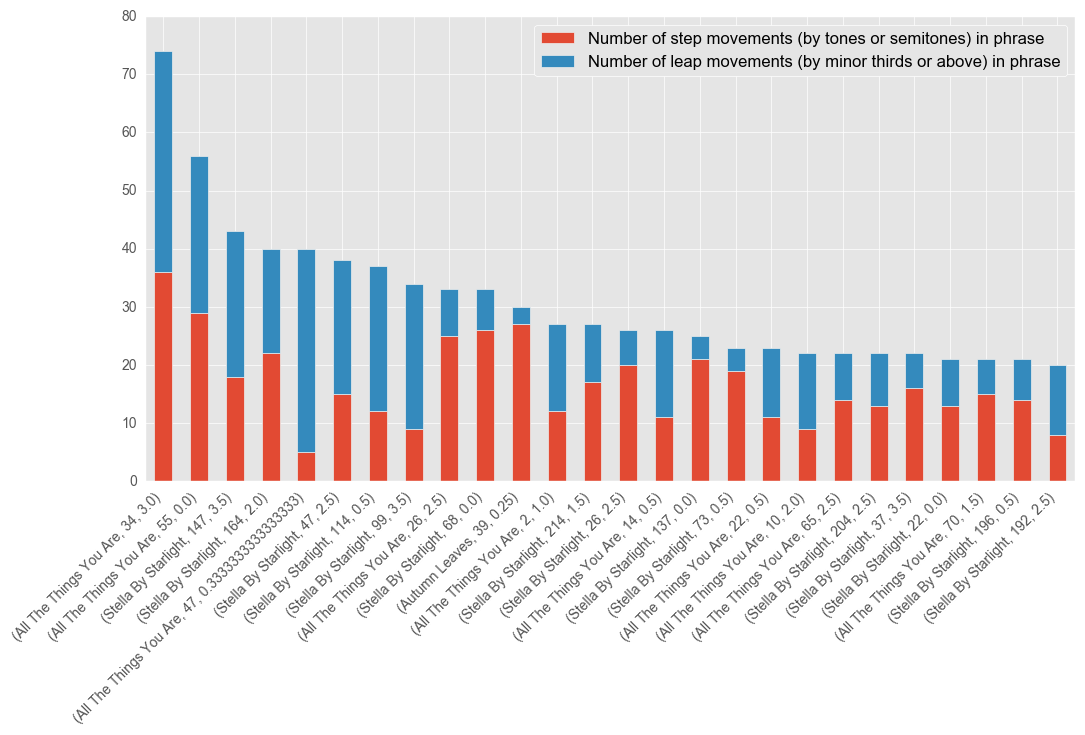

In [60]:
#STEPS VS LEAPS - KJ
x = ref_solos[ref_solos['Number of notes in phrase'] > 20]
x = x.sort_values('Number of notes in phrase',ascending = False)
x.index = x[['Title', 'Measure in which phrase begins', 'Measure location in which phrase begins']]
x[['Number of step movements (by tones or semitones) in phrase', 'Number of leap movements (by minor thirds or above) in phrase']].plot(kind="bar", figsize=(12,6) ,stacked=True)
plt.xticks(rotation=45, ha='right')


In [61]:
x = kj_solos[kj_solos['Number of notes in melody'] > 40]
x = x.sort_values('Number of notes in melody',ascending = False)
x.index = x[['Title', 'Measure in which phrase begins', 'Measure location in which phrase begins']]
x[['Number of positive steps or leaps in melody', 'Number of negative steps or leaps in melody']][0:30].plot(kind="bar", figsize=(12,6) ,stacked=True)
plt.xticks(rotation=45, ha='right')

KeyError: 'Number of notes in melody'

In [ ]:
x = ref_solos[ref_solos['Number of notes in phrase'] > 20]
x = x.sort_values('Number of notes in phrase',ascending = False)
x.index = x[['Title', 'Measure in which phrase begins', 'Measure location in which phrase begins']]
x[['Number of positive steps or leaps in phrase', 'Number of negative steps or leaps in phrase']][0:30].plot(kind="bar", figsize=(12,6) ,stacked=True)
plt.xticks(rotation=45, ha='right')